In [1]:
import os
import sys
ROOT_DIR = os.path.dirname(os.path.abspath('..'))
sys.path.insert(0, os.path.abspath(ROOT_DIR))

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
import statsmodels
import sklearn

In [2]:
df = pd.read_csv('../data/raw/productivity_growth.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24442 entries, 0 to 24441
Data columns (total 17 columns):
LOCATION                 24442 non-null object
Country                  24442 non-null object
SUBJECT                  24442 non-null object
Subject                  24442 non-null object
MEASURE                  24442 non-null object
Measure                  24442 non-null object
TIME                     24442 non-null int64
Time                     24442 non-null int64
Unit Code                24442 non-null object
Unit                     24442 non-null object
PowerCode Code           24442 non-null int64
PowerCode                24442 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    24442 non-null float64
Flag Codes               150 non-null object
Flags                    150 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 3.2+ MB


In [28]:
df.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1985,1985,PC,Percentage,0,Units,NaN,NaN,5.122257,NaN,NaN
1,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1986,1986,PC,Percentage,0,Units,NaN,NaN,4.945708,NaN,NaN
2,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1987,1987,PC,Percentage,0,Units,NaN,NaN,4.964987,NaN,NaN
3,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1988,1988,PC,Percentage,0,Units,NaN,NaN,5.063412,NaN,NaN
4,AUS,Australia,T_KSER,Total capital services,GRW,Annual growth/change,1989,1989,PC,Percentage,0,Units,NaN,NaN,4.829607,NaN,NaN


In [3]:
df['Subject'].unique()

array(['Total capital services', 'Multifactor productivity',
       'Capital deepening', 'GDP per hour worked, constant prices ',
       'Average hours worked per person employed',
       'Total employment (number of persons employed) ',
       'GDP per person employed, constant prices',
       'GDP per capita, constant prices ', 'Total hours worked',
       'Labour utilisation (=hours worked per head of population)',
       'Unit Labour Costs', 'Labour compensation per hour worked',
       'Labour compensation per employee',
       'Unit Labour Costs, employment based', 'ICT capital deepening',
       'ICT capital', 'Non-ICT capital deepening', 'Non-ICT capital',
       'Unit Labour Costs, USD exchange-rate adjusted',
       'Unit Labour Costs, employment based, USD exchange-rate adjusted'],
      dtype=object)

In [4]:
df['Measure'].unique()

array(['Annual growth/change'], dtype=object)

In [5]:
df['Time'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984], dtype=int64)

In [6]:
countries = df['Country'].unique()
countries

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Korea',
       'Netherlands', 'New Zealand', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'United States', 'Turkey',
       'Iceland', 'Israel', 'Slovenia', 'Czech Republic',
       'Slovak Republic', 'Chile', 'Russia', 'Luxembourg', 'Norway',
       'Poland', 'Mexico', 'Hungary', 'Estonia', 'South Africa', 'Greece',
       'Brazil', 'Latvia', 'European Union (28 countries)',
       'OECD - Total', 'G7', 'Colombia', 'Lithuania',
       'Euro area (19 countries)', 'Costa Rica'], dtype=object)

In [55]:
df1 = pd.read_csv('../data/raw/productivity_growth_by_industry.csv')
df1.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,ACTIVITY,Activity,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1995,1995,PC,Percentage,0,Units,NaN,NaN,3.166585,NaN,NaN
1,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1996,1996,PC,Percentage,0,Units,NaN,NaN,3.655702,NaN,NaN
2,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1997,1997,PC,Percentage,0,Units,NaN,NaN,3.077741,NaN,NaN
3,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1998,1998,PC,Percentage,0,Units,NaN,NaN,3.351160,NaN,NaN
4,AUS,Australia,I4_ANA_GVAHRS,"Gross value added per hour worked, constant pr...",GRW,Annual growth/change,A_U,Total,1999,1999,PC,Percentage,0,Units,NaN,NaN,0.971293,NaN,NaN


In [48]:
set(df1['Country'].unique()) == set(countries)

False

In [52]:
countries2 = df1['Country'].unique()

In [53]:
df1['Subject'].unique()

array(['Gross value added per hour worked, constant prices',
       'Gross value added per person employed, constant prices',
       'Total employment (number of persons employed)',
       'Total hours worked', 'Average hours worked per person employed',
       'Unit Labour Costs', 'Labour compensation per hour worked',
       'Unit Labour Costs, employment based',
       'Labour compensation per employee',
       'Gross value added, constant prices'], dtype=object)

In [56]:
df1['Activity'].unique()

array(['Total ', 'Non-agriculture business sector excluding real estate',
       'Industry including energy', 'Manufacturing', 'Construction',
       'Business sector services excluding real estate',
       'Wholesale retail trade accommodation food services, transportation and storage',
       'Information and communication',
       'Financial and insurance activities',
       'Professional, scientific and technical activities, Administrative and support service activities',
       'Mining and utilities'], dtype=object)

In [58]:
def _regplot(df, country, subject):
    fig, ax = plt.subplots(figsize=(20,10))
    # locally weighted linear regression
    sns.regplot(x='Time', y='Value', lowess=True, scatter=False, data=df)
    # linear regression
    sns.regplot(x='Time', y='Value', scatter=False, data=df)
    sns.lineplot(x='Time', y='Value', data=df)
    plt.title(f'{country} Productivity Growth')
    plt.ylabel(f'Change in {subject}')

In [30]:
def collect_data(df, subject, activity=None) -> dict:
    df_cdict={}
    if activity is None:
        for c in countries:
            df_cdict[c] = df[
            (df['Country'] == c) & (df['Subject'] == subject) 
            ]
        return df_cdict
    else:
        for c in countries:
            df_cdict[c] = df[
                (df['Country'] == c) & (df['Subject'] == subject)
                & (df['Activity'] == activity)
            ]
        return df_cdict

In [59]:
def regplot(df, country, subject, activity=None):
    if activity is None:
        d = collect_data(df, subject)
        return _regplot(d[country], country, subject)
    else:
        d = collect_data(df, subject, activity)
        return _regplot(d[country], country, subject, activity)

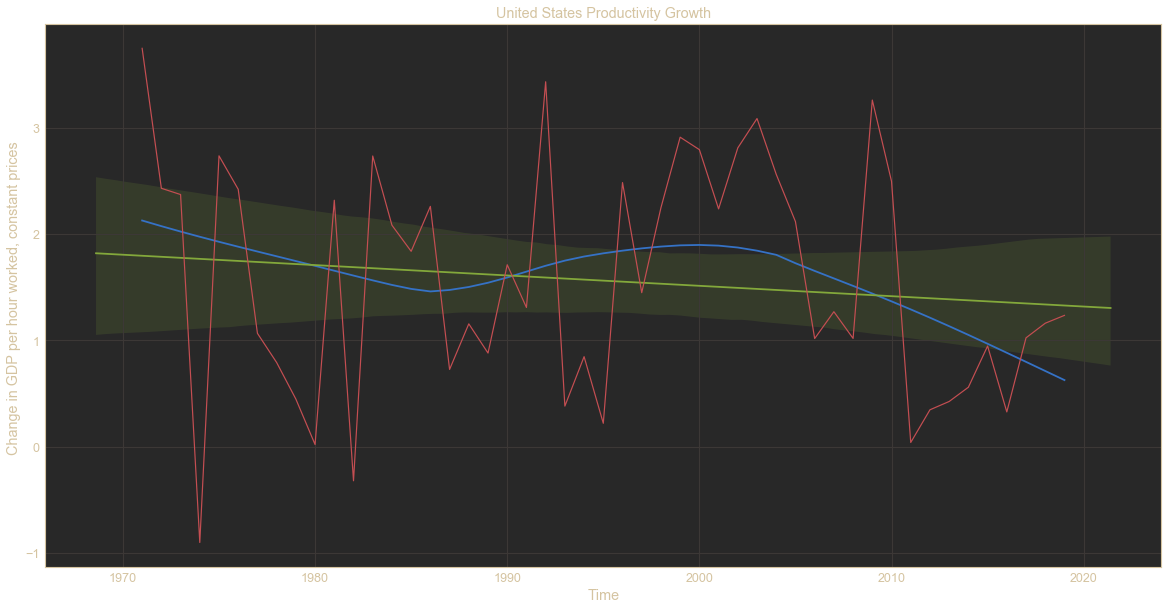

In [35]:
regplot(
    df, 
    country='United States', 
    subject='GDP per hour worked, constant prices '
)

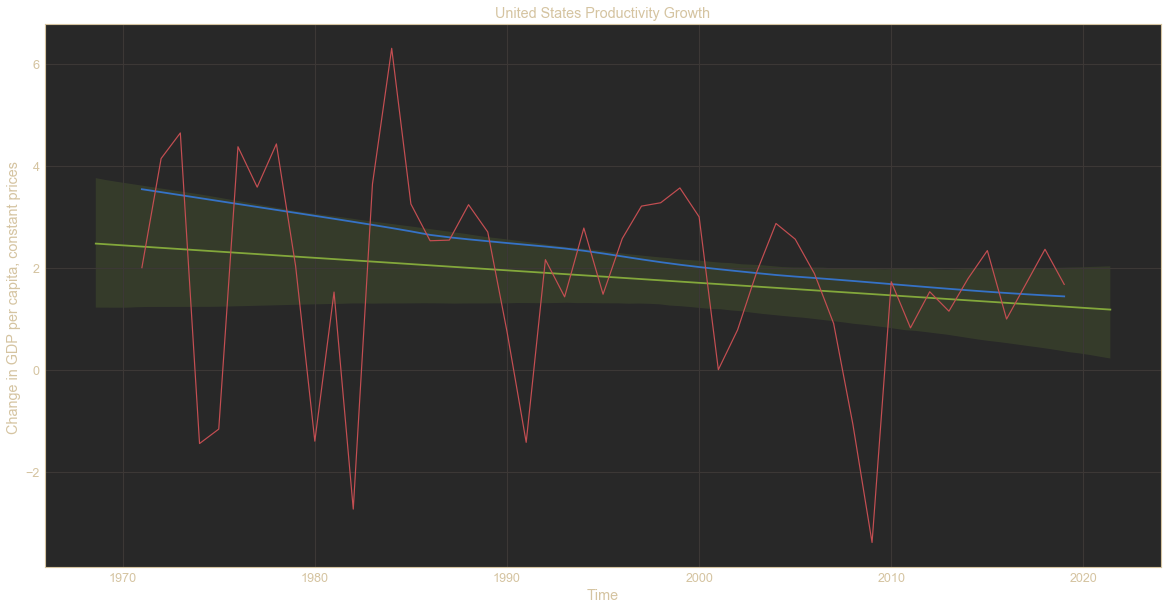

In [36]:
regplot(
    df, 
    country='United States', 
    subject='GDP per capita, constant prices '
)

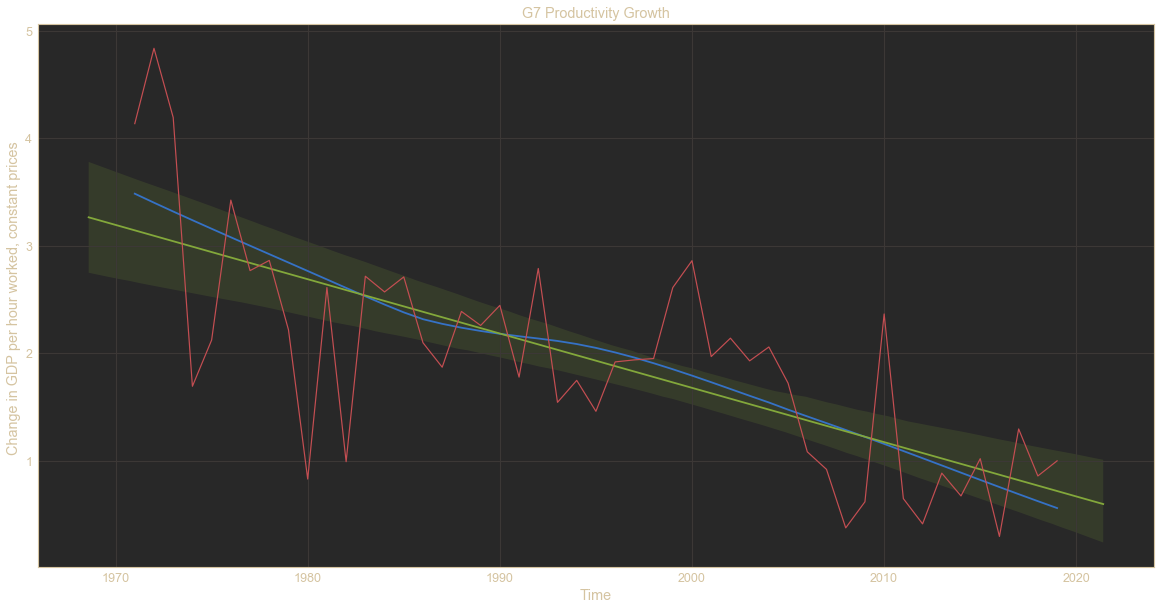

In [60]:
regplot(
    df, 
    country='G7', 
    subject='GDP per hour worked, constant prices '
)

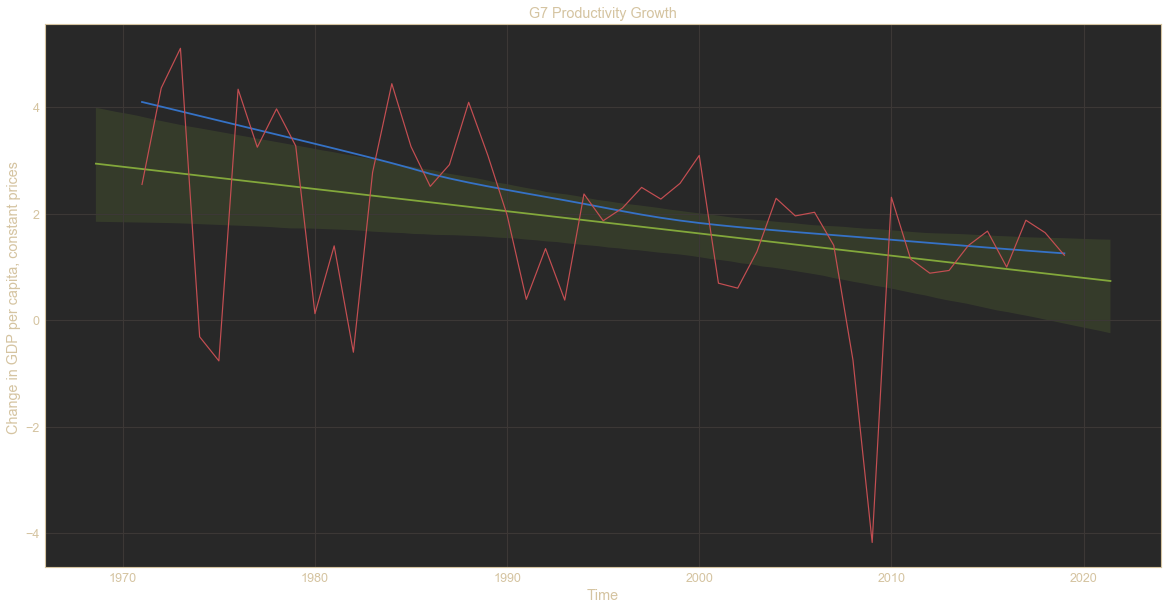

In [37]:
regplot(
    df, 
    country='G7', 
    subject='GDP per capita, constant prices '
)